### 1. Importing Libraries

In [941]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.feature_selection import RFE 

### 2. Importing the dataset and doing data exploration

In [851]:
df = pd.read_csv("C:\\Users\saumi\Desktop\Take_home_test\Train_set_zeta_disease.csv")

In [852]:
df.head(5)

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
0,54,189,27.1,80,0,1.5038,0,10,0
1,23,150,38.5,68,71,0.3868,55,2,0
2,47,186,29.9,90,0,0.2728,0,7,0
3,18,150,30.8,70,1033,0.6598,56,0,0
4,24,160,32.4,74,125,0.7608,59,2,0


In [853]:
df_copy= df.copy() #duplicating dataframe so can perform some analysis without causing changes to the original dataset

* Replacing 0 with NaN for a better visualization (Not a necessary step just used it to count the total NaN values in different columns)

In [854]:
df_copy["age"]=df_copy[["age"]].replace(0, np.nan )
df_copy["weight"]=df_copy[["weight"]].replace(0, np.nan )
df_copy["bmi"]=df_copy[["bmi"]].replace(0, np.nan )
df_copy["blood_pressure"]=df_copy[["blood_pressure"]].replace(0, np.nan )
df_copy["insulin_test"]=df_copy[["insulin_test"]].replace(0, np.nan )
df_copy["liver_stress_test"]=df_copy[["liver_stress_test"]].replace(0, np.nan )
df_copy["cardio_stress_test"]=df_copy[["cardio_stress_test"]].replace(0, np.nan )

In [855]:
df_copy

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
0,54,189,27.1,80.0,NaN,1.5038,NaN,10,0
1,23,150,38.5,68.0,71.0,0.3868,55.0,2,0
2,47,186,29.9,90.0,NaN,0.2728,NaN,7,0
3,18,150,30.8,70.0,1033.0,0.6598,56.0,0,0
4,24,160,32.4,74.0,125.0,0.7608,59.0,2,0
...,...,...,...,...,...,...,...,...,...
795,26,161,28.4,90.0,78.0,0.5578,42.0,3,0
796,37,165,33.7,60.0,NaN,0.3078,69.0,6,1
797,27,166,25.6,74.0,NaN,0.2638,NaN,5,0
798,109,139,28.1,66.0,94.0,0.2298,53.0,1,0


In [856]:
df_copy.isnull().sum()

age                     0
weight                  0
bmi                    11
blood_pressure         35
insulin_test          370
liver_stress_test       0
cardio_stress_test    227
years_smoking           0
zeta_disease            0
dtype: int64

<AxesSubplot:title={'center':'Count'}>

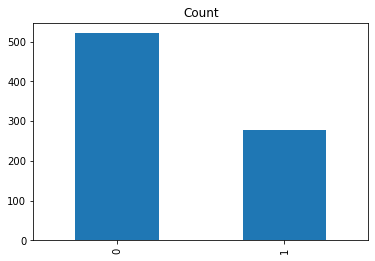

In [857]:
df_copy['zeta_disease'].value_counts().plot(kind='bar',title='Count')
#sns.barplot(x="index",y="",data=xx)

* Here we can see that the dataset is imbalanced so we need to consider F1 score, Recall instead of accuracy.

## Trying 3 different methods.
#### 1. Deleting the null rows in insulin_test and cardio_stress_test and make predictions
#### 2. Removing columns having 30-35% null values. ( First checking it with feature selection if the feature are important or not)
#### 3. Replacing all NaN values to make predictions



### Method 1 - Deleting the null rows in insulin_test and cardio_stress_test and make predictions


In [858]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\saumi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\saumi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='blood_pressure'>

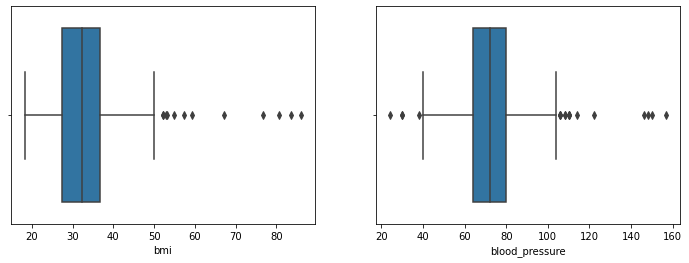

In [859]:
fig, axs = plt.subplots(ncols=2,figsize=(12,4))
sns.boxplot(df_copy.bmi,ax=axs[0])
sns.boxplot(df_copy.blood_pressure,ax=axs[1])

* As we can see from above boxplots, they both have outliers and are skewed so it is better to replace null values with median as mean value are affected due to the outliers

In [860]:
df_copy['bmi'].fillna(value=df_copy['bmi'].median(),inplace=True) #replacing NaN with Median value
df_copy['blood_pressure'].fillna(value=df_copy['blood_pressure'].median(),inplace=True) #replacing NaN with Median value


In [861]:
df_copy.isnull().sum() # checking if null values are replaced

age                     0
weight                  0
bmi                     0
blood_pressure          0
insulin_test          370
liver_stress_test       0
cardio_stress_test    227
years_smoking           0
zeta_disease            0
dtype: int64

In [862]:
df_method1 =df_copy.dropna() # dropped null value rows having null values in insulin_test and cardio_stress_test

In [863]:
df_method1.isnull().sum()

age                   0
weight                0
bmi                   0
blood_pressure        0
insulin_test          0
liver_stress_test     0
cardio_stress_test    0
years_smoking         0
zeta_disease          0
dtype: int64

In [864]:
df_method1

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
1,23,150,38.5,68.0,71.0,0.3868,55.0,2,0
3,18,150,30.8,70.0,1033.0,0.6598,56.0,0,0
4,24,160,32.4,74.0,125.0,0.7608,59.0,2,0
6,20,154,27.8,64.0,116.0,0.5168,53.0,0,0
7,37,167,34.5,88.0,145.0,0.4658,54.0,1,1
...,...,...,...,...,...,...,...,...,...
792,56,239,30.1,60.0,846.0,0.4608,53.0,1,1
793,22,118,25.0,70.0,66.0,0.2498,62.0,2,0
794,46,176,38.5,88.0,108.0,0.4118,66.0,8,0
795,26,161,28.4,90.0,78.0,0.5578,42.0,3,0


* Here we can see that the number of rows remaining are only 430 so half of the data was lost but still we keep both the features for prediction. Removing null rows is only suggested when you have a large dataset and you have less Null Rows, but as you can see that for this example almost 50% data was lost. Only tested this to show different methods.

In [865]:
#Splitting dataset into X(input) and Y(output) 
X = df_method1.drop(columns=['zeta_disease'])
Y = df_method1['zeta_disease']


In [866]:
#Splitting into X_train, X_test, Y_train and Y_test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state = 1)

#### Logistic Regression

Train Accuracy =  0.7906976744186046
Test Accuracy =  0.7674418604651163
F1 score = 0.5945945945945945
Precision =  0.7333333333333333
Recall =  0.5


Text(33.0, 0.5, 'Actual')

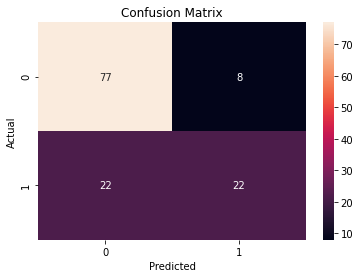

In [989]:
#Trying logistic regression because it mostly works better for binary classification kind of problems
clf = LogisticRegression(random_state=None, max_iter = 200).fit(X_train, y_train)
clf.predict(X_train)
print("Train Accuracy = ",clf.score(X_train, y_train)) #To check for overfitting or underfitting

predict=clf.predict(X_test)
print("Test Accuracy = ",clf.score(X_test, y_test))
print("F1 score =", f1_score(y_test, predict))
print("Precision = ",precision_score(y_test,predict))
print("Recall = ",recall_score(y_test,predict))
ax=plt.subplot()
sns.heatmap(confusion_matrix(y_test,predict),annot=True,ax=ax,fmt='g')
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')


#### Random Forest Classifier

Train Accuracy =  0.8172757475083057
Test Accuracy =  0.8062015503875969
F1 score = 0.6268656716417911
Precision =  0.9130434782608695
Recall =  0.4772727272727273


Text(33.0, 0.5, 'Actual')

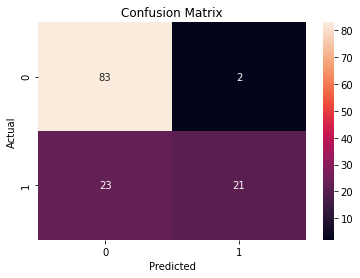

In [1025]:
clf2 = RandomForestClassifier(max_depth=2, random_state=1)
clf2.fit(X_train, y_train)
clf2.predict(X_train)
print("Train Accuracy = ",clf2.score(X_train, y_train)) #To check for overfitting or underfitting

predict=clf2.predict(X_test)
print("Test Accuracy = ",clf2.score(X_test, y_test))
print("F1 score =",f1_score(y_test, predict))
print("Precision = ",precision_score(y_test,predict))
print("Recall = ",recall_score(y_test,predict))
ax=plt.subplot()
sns.heatmap(confusion_matrix(y_test,predict),annot=True,ax=ax,fmt='g')
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')


#### K Nearest Neighbors

Train Accuracy =  0.8770764119601329
Test Accuracy =  0.6976744186046512
F1 score = 0.3157894736842105
Precision =  0.6923076923076923
Recall =  0.20454545454545456


Text(33.0, 0.5, 'Actual')

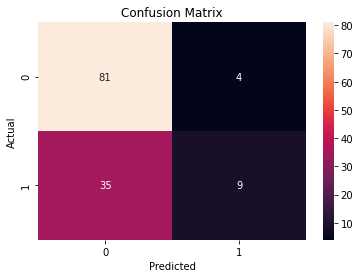

In [1026]:
clf3 = KNeighborsClassifier(n_neighbors=2)
clf3.fit(X_train, y_train)
clf3.predict(X_train)
print("Train Accuracy = ",clf3.score(X_train, y_train)) #To check for overfitting or underfitting

predict=clf3.predict(X_test)
print("Test Accuracy = ",clf3.score(X_test, y_test))
print("F1 score =",f1_score(y_test, predict))
print("Precision = ",precision_score(y_test,predict))
print("Recall = ",recall_score(y_test,predict))

ax=plt.subplot()
sns.heatmap(confusion_matrix(y_test,predict),annot=True,ax=ax,fmt='g')
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')


### Recursive Feature Elemination to find out which features are important

In [871]:


model = LogisticRegression(random_state=0, max_iter = 200)
rfe = RFE(model,n_features_to_select=7)
fit = rfe.fit(X, Y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 7
Selected Features: [ True  True  True  True False  True  True  True]
Feature Ranking: [1 1 1 1 2 1 1 1]


* Here we can see that the feature insulin test is less important than other features to make prediction 

C:\Users\saumi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cardio_stress_test', ylabel='Density'>

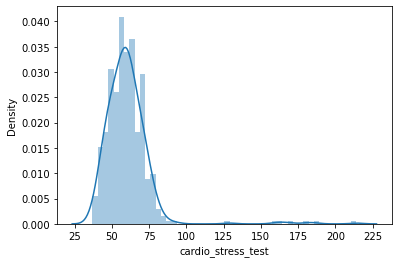

In [872]:
#Checking weather we can replace null values of cardio_Stress_test by mean if it is a normal curve

sns.distplot(df_copy.cardio_stress_test)


* Here we can see that it has some outliers and it is skewed so it is better to replace with the median value instead of mean value. We can also check outliers by plotting boxplot

C:\Users\saumi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cardio_stress_test'>

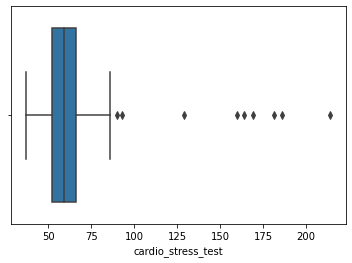

In [873]:
sns.boxplot(df_copy.cardio_stress_test)

### Method 2 - Removing Insulin test feature as it is not important. Replacing cardio stress test values by median.


In [874]:
df_method2= df_copy.copy()

In [875]:
df_method2

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
0,54,189,27.1,80.0,NaN,1.5038,NaN,10,0
1,23,150,38.5,68.0,71.0,0.3868,55.0,2,0
2,47,186,29.9,90.0,NaN,0.2728,NaN,7,0
3,18,150,30.8,70.0,1033.0,0.6598,56.0,0,0
4,24,160,32.4,74.0,125.0,0.7608,59.0,2,0
...,...,...,...,...,...,...,...,...,...
795,26,161,28.4,90.0,78.0,0.5578,42.0,3,0
796,37,165,33.7,60.0,NaN,0.3078,69.0,6,1
797,27,166,25.6,74.0,NaN,0.2638,NaN,5,0
798,109,139,28.1,66.0,94.0,0.2298,53.0,1,0


In [876]:
df_method2 = df_method2.drop(columns=['insulin_test'])
df_method2['cardio_stress_test'].fillna(value=df_method2['cardio_stress_test'].median(),inplace=True)


In [877]:
df_method2.isnull().sum()

age                   0
weight                0
bmi                   0
blood_pressure        0
liver_stress_test     0
cardio_stress_test    0
years_smoking         0
zeta_disease          0
dtype: int64

In [878]:
df_method2

,age,weight,bmi,blood_pressure,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
0,54,189,27.1,80.0,1.5038,59.0,10,0
1,23,150,38.5,68.0,0.3868,55.0,2,0
2,47,186,29.9,90.0,0.2728,59.0,7,0
3,18,150,30.8,70.0,0.6598,56.0,0,0
4,24,160,32.4,74.0,0.7608,59.0,2,0
...,...,...,...,...,...,...,...,...
795,26,161,28.4,90.0,0.5578,42.0,3,0
796,37,165,33.7,60.0,0.3078,69.0,6,1
797,27,166,25.6,74.0,0.2638,59.0,5,0
798,109,139,28.1,66.0,0.2298,53.0,1,0


C:\Users\saumi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cardio_stress_test', ylabel='Density'>

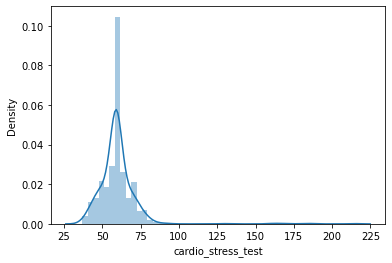

In [879]:
sns.distplot(df_method2.cardio_stress_test)

In [880]:
#Splitting dataset into X(input) and Y(output) 
X2 = df_method2.drop(columns=['zeta_disease'])
Y2 = df_method2['zeta_disease']


In [881]:
X2

,age,weight,bmi,blood_pressure,liver_stress_test,cardio_stress_test,years_smoking
0,54,189,27.1,80.0,1.5038,59.0,10
1,23,150,38.5,68.0,0.3868,55.0,2
2,47,186,29.9,90.0,0.2728,59.0,7
3,18,150,30.8,70.0,0.6598,56.0,0
4,24,160,32.4,74.0,0.7608,59.0,2
...,...,...,...,...,...,...,...
795,26,161,28.4,90.0,0.5578,42.0,3
796,37,165,33.7,60.0,0.3078,69.0,6
797,27,166,25.6,74.0,0.2638,59.0,5
798,109,139,28.1,66.0,0.2298,53.0,1


In [882]:
#Splitting into X_train, X_test, Y_train and Y_test
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, Y2, test_size=0.3,random_state= 1)

#### Logistic Regression

Train Accuracy =  0.775
Test Accuracy =  0.7708333333333334
F1 score = 0.6451612903225805
Precision =  0.704225352112676
Recall =  0.5952380952380952


Text(33.0, 0.5, 'Actual')

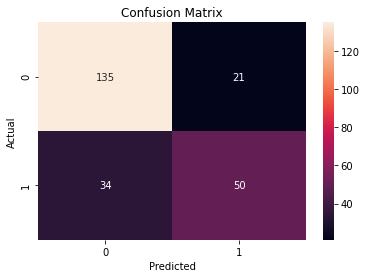

In [1024]:
clf4 = LogisticRegression(random_state=None, max_iter = 200).fit(X_train2, y_train2)
clf4.predict(X_train2)
print("Train Accuracy = ",clf4.score(X_train2, y_train2)) #To check for overfitting or underfitting

predict=clf4.predict(X_test2)
print("Test Accuracy = ",clf4.score(X_test2, y_test2))
print("F1 score =",f1_score(y_test2, predict))
print("Precision = ",precision_score(y_test2,predict))
print("Recall = ",recall_score(y_test2,predict))

ax=plt.subplot()
sns.heatmap(confusion_matrix(y_test2,predict),annot=True,ax=ax,fmt='g')
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

* It has a better accuracy but in our case Recall is important as correctly predicting people having virus is important. Here higher False Negative i.e. people actually having virus but are release will cause an issue.


#### Random Forest Classifier

Train Accuracy =  0.8214285714285714
Test Accuracy =  0.775
F1 score = 0.6197183098591549
Precision =  0.7586206896551724
Recall =  0.5238095238095238


Text(33.0, 0.5, 'Actual')

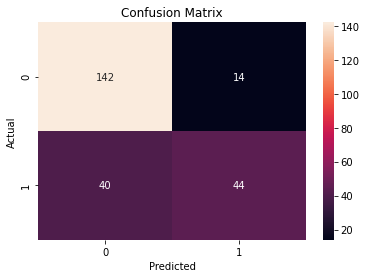

In [1002]:
clf5 = RandomForestClassifier(max_depth=4, random_state=1)
clf5.fit(X_train2, y_train2)
clf5.predict(X_train2)
print("Train Accuracy = ",clf5.score(X_train2, y_train2)) #To check for overfitting or underfitting

predict=clf5.predict(X_test2)
print("Test Accuracy = ",clf5.score(X_test2, y_test2))
print("F1 score =",f1_score(y_test2, predict))

print("Precision = ",precision_score(y_test2,predict))
print("Recall = ",recall_score(y_test2,predict))
ax=plt.subplot()
sns.heatmap(confusion_matrix(y_test2,predict),annot=True,ax=ax,fmt='g')
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

#### K NN

Train Accuracy =  0.8375
Test Accuracy =  0.725
F1 score = 0.5352112676056338
Precision =  0.6551724137931034
Recall =  0.4523809523809524


Text(33.0, 0.5, 'Actual')

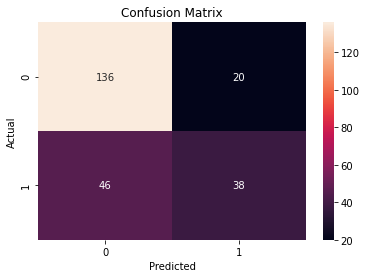

In [1003]:
clf6 = KNeighborsClassifier(n_neighbors=2)
clf6.fit(X_train2, y_train2)
clf6.predict(X_train2)
print("Train Accuracy = ",clf6.score(X_train2, y_train2)) #To check for overfitting or underfitting

predict=clf6.predict(X_test2)
print("Test Accuracy = ",clf6.score(X_test2, y_test2))
print("F1 score =",f1_score(y_test2, predict))

print("Precision = ",precision_score(y_test2,predict))
print("Recall = ",recall_score(y_test2,predict))
ax=plt.subplot()
sns.heatmap(confusion_matrix(y_test2,predict),annot=True,ax=ax,fmt='g')
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

* Here we can see Logistic Regression has the highest F1 score for this method. It was better than removing null rows as we used feature selection and removed the less important column. By this method we almost had all of our data i.e. 800 rows of data for 7 columns.

### Method 3 - Replacing NaN values of insulin_test and cardio_Stress_test with median values

In [925]:
df_method3= df_copy.copy()

In [926]:
df_method3

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
0,54,189,27.1,80.0,NaN,1.5038,NaN,10,0
1,23,150,38.5,68.0,71.0,0.3868,55.0,2,0
2,47,186,29.9,90.0,NaN,0.2728,NaN,7,0
3,18,150,30.8,70.0,1033.0,0.6598,56.0,0,0
4,24,160,32.4,74.0,125.0,0.7608,59.0,2,0
...,...,...,...,...,...,...,...,...,...
795,26,161,28.4,90.0,78.0,0.5578,42.0,3,0
796,37,165,33.7,60.0,NaN,0.3078,69.0,6,1
797,27,166,25.6,74.0,NaN,0.2638,NaN,5,0
798,109,139,28.1,66.0,94.0,0.2298,53.0,1,0


In [927]:
df_method3['insulin_test'].fillna(value=df_method3['insulin_test'].median(),inplace=True)
df_method3['cardio_stress_test'].fillna(value=df_method3['cardio_stress_test'].median(),inplace=True)

In [928]:
#Splitting dataset into X(input) and Y(output) 
X3 = df_method3.drop(columns=['zeta_disease'])
Y3 = df_method3['zeta_disease']

In [929]:
#Splitting into X_train, X_test, Y_train and Y_test
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, Y3, test_size=0.3,random_state=None)

#### Logistic Regression

Train Accuracy =  0.7678571428571429
Test Accuracy =  0.7625
F1 score = 0.6415094339622641
Precision =  0.6710526315789473
Recall =  0.6144578313253012


Text(33.0, 0.5, 'Actual')

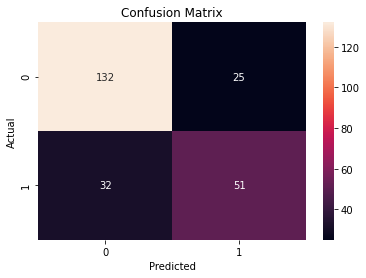

In [1006]:
clf8 = LogisticRegression(random_state= None, max_iter = 300).fit(X_train3, y_train3)
clf8.predict(X_train3)
print("Train Accuracy = ",clf8.score(X_train3, y_train3)) #To check for overfitting or underfitting

predict=clf8.predict(X_test3)
print("Test Accuracy = ",clf8.score(X_test3, y_test3))
print("F1 score =",f1_score(y_test3, predict))
print("Precision = ",precision_score(y_test3,predict))
print("Recall = ",recall_score(y_test3,predict))
ax=plt.subplot()
sns.heatmap(confusion_matrix(y_test3,predict),annot=True,ax=ax,fmt='g')
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

#### Random Forest

* It had the second best accuracy and f1 scores, but it has a higher Recall score. In our example it is important to take recall into consideration as here actual predicted zeta disease person is better.

Train Accuracy =  0.8357142857142857
Test Accuracy =  0.7458333333333333
F1 score = 0.6013071895424836
Precision =  0.6571428571428571
Recall =  0.5542168674698795


Text(33.0, 0.5, 'Actual')

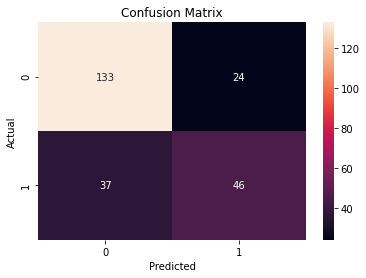

In [1004]:
clf9 = RandomForestClassifier(max_depth=4, random_state=0)
clf9.fit(X_train3, y_train3)
clf9.predict(X_train3)
print("Train Accuracy = ",clf9.score(X_train3, y_train3)) #To check for overfitting or underfitting

predict=clf9.predict(X_test3)
print("Test Accuracy = ",clf9.score(X_test3, y_test3))
print("F1 score =",f1_score(y_test3, predict))
print("Precision = ",precision_score(y_test3,predict))
print("Recall = ",recall_score(y_test3,predict))
ax=plt.subplot()
sns.heatmap(confusion_matrix(y_test3,predict),annot=True,ax=ax,fmt='g')
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

### Importing Test set to make predictions on Zeta Disease

In [1016]:
df_test = pd.read_csv("C:\\Users\saumi\Desktop\Take_home_test\Test_set_zeta_disease.csv")

In [1017]:
df_test =df_test.drop(columns=['zeta_disease'])

In [1014]:
#df_test_req = df_test.drop(columns=['insulin_test'])

In [1018]:
df_test

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking
0,24,151,39.5,69,72,1.3968,56,4
1,27,179,35.5,89,156,1.6608,43,6
2,34,147,26.9,76,74,1.6958,53,2
3,35,206,32.4,73,127,1.4608,61,6
4,60,193,29.8,62,192,1.7798,65,9
5,45,120,36.5,108,50,1.2978,54,12
6,20,139,38.2,61,77,1.5818,68,3
7,23,137,31.2,70,73,1.4168,59,7
8,36,195,30.5,59,141,1.4498,59,6
9,19,193,25.8,84,66,1.7938,50,3


### Logistic Regression of the Method 3 has the highest recall and F1 Score, so we would make the predictions for the test set using the same. As recall is important for our example, i.e. correctly predicting actual people having the disease and having less False negatives.

In [1019]:
df_test['zeta_disease']=clf8.predict(df_test)

In [1020]:
df_test

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
0,24,151,39.5,69,72,1.3968,56,4,0
1,27,179,35.5,89,156,1.6608,43,6,1
2,34,147,26.9,76,74,1.6958,53,2,0
3,35,206,32.4,73,127,1.4608,61,6,1
4,60,193,29.8,62,192,1.7798,65,9,1
5,45,120,36.5,108,50,1.2978,54,12,0
6,20,139,38.2,61,77,1.5818,68,3,0
7,23,137,31.2,70,73,1.4168,59,7,0
8,36,195,30.5,59,141,1.4498,59,6,1
9,19,193,25.8,84,66,1.7938,50,3,1


In [1021]:
df_predicted= df_test.copy()

### Saving the solution as CSV files

In [1022]:
df_predicted.to_csv("Solution_1.csv", index = False)

In [1023]:
df_final = df_predicted['zeta_disease']
df_final.to_csv("predicted_zeta",index = False)